Partiendo del sistema

$\dot T = aT - kT (1 - \exp(-M))$

$\dot M = - \gamma M + v_m$

Aproximando la exponencial en serie de Taylor a segundo término

$\dot T = aT - kMT$

$\dot M = - \gamma M + v_m$


Para este sistema tenemos el Hamiltoniano:

$\mathscr{H} = x_1 + u + \lambda_1 (ax_1 -k x_1 x_2) + \lambda_2 (- \gamma x_2 + u)$

Con las condiciones siguientes condiciones

$\frac{\partial \mathscr{H}}{\partial \lambda_i} = \dot x_i$

$- \frac{\partial \mathscr{H}}{\partial x_i} = \dot \lambda_i$

$\frac{\partial \mathscr{H}}{\partial u} = 0$

El sistema de ecuaciones a resolver es: 

$\frac{dx_{1}}{dt} = a x_{1} - kx_{1}x_{2}$

$\frac{dx_{2}}{dt} = -\gamma x_{2} + u$

$\frac{d \lambda_{1}}{dt}  = \lambda_{1}( kx_2 - a) -1$

$\frac{d \lambda_{2}}{dt} = \lambda_1 kx_1 + \lambda_2 \gamma$

$\lambda_2 = -1$


Sujeto a las condiciones

$x_{1}(0) = 2e7$

$x_{2}(0) = 0$







In [ ]:
import sympy as sym


In [ ]:
sym.init_printing()

Iniciaremos resolviendo la segunda ecuación del sistema.

$\frac{dx_{2}}{dt} = -\gamma x_{2} + u$

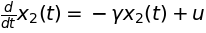

In [ ]:
t,g, u = sym.symbols('t, gamma, u')
x2 = sym.Function('x2')(t)
dx2dt = x2.diff(t)
segunec = sym.Eq(dx2dt, -g*x2 + u)
segunec

In [ ]:
sym.dsolve(segunec)

Resolviendo la segunda ecuación, tenemos que 

$x_{2} = \frac{u}{\gamma} + k_{1}e^{-\gamma t}$

Aplicando la condición inicial $x_2 (0) = 0$

$x_2 (t) = \frac{u}{\gamma}(1 -  e^{-\gamma t}) $



In [ ]:
X2 = u/g * (1-sym.exp(-g*t))
X2


Resolveremos, ahora, la primera ecuación del sistema

$\frac{dx_{1}}{dt} = a x_{1} - kx_{1}x_{2}$

Usando el valor obtenido para $x_{2}$

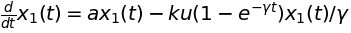

In [ ]:
a,b,k = sym.symbols('a,b,k')
x1 = sym.Function('x1')(t)
dx1dt = x1.diff(t)
primec = sym.Eq(dx1dt, a*x1 - k*x1*X2)


primec

In [ ]:
z1 = sym.dsolve(primec)
z1

        ⎧                         -γ⋅t            
        ⎪            k⋅t⋅u   k⋅u⋅ℯ                
        ⎪ C₁ + a⋅t - ───── - ─────────            
        ⎪              γ          2               
x₁(t) = ⎨                        γ           2    
        ⎪ℯ                              for γ  ≠ 0
        ⎪                                         
        ⎪           C₁ + a⋅t                      
        ⎩          ℯ                    otherwise 

Como $\gamma^{2} \neq 0$, entonces tenemos que 

$x_1 (t) = k_1 e^{at} e^{- \frac{ktu}{\gamma}} e^{- \frac{ku e^{- \gamma t}}{\gamma^{2}}}$

Aplicando la condición inicial $x_1 (0) = 2 \times 10^{7}$

$k1 = 2 \times 10^{7}$

Mantendremos $k_1$ como una constante.


Ahora se resolverá por el control $u$

In [ ]:

import sympy as sym
sym.init_printing()
u,g, t, k1, a, k = sym.symbols('u, gamma, t, k1, a, k')

In [ ]:
X2 = u/g * (1-sym.exp(-g*t))
X1 = k1*sym.exp(a*t) * sym.exp(-k*u*t/g) * sym.exp(-k*u*sym.exp(-g*t)/g**2)


In [ ]:
X2

In [ ]:
X1

In [ ]:
ecuaciondeu = sym.Eq(((k*X2 - a)/X1)*2*g/k, 1)
ecuaciondeu

In [ ]:
soldeu = sym.solve(ecuaciondeu, u)

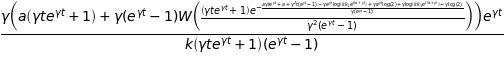

In [ ]:
soldeu[0]

$u(t) = \frac{\gamma e^{\gamma t} \left( a(\gamma t e^{\gamma t} + 1) + \gamma (e^{\gamma t} - 1) W \left( z \right) \right)}{k(\gamma t e^{\gamma t} + 1)(e^{\gamma t} - 1)} 
$

$z = \frac{(\gamma t e^{\gamma t} + 1) e^{- \frac{a \gamma t e^{\gamma t} + a + \gamma^{2}t(e^{\gamma t}-1) - \gamma e^{\gamma t} log \left( k k_1 e^{t(a + \gamma)} \right) + \gamma e^{\gamma t} log(2) + \gamma log \left( k k_1 e^{t (a + \gamma)} \right) - \gamma log(2)}{\gamma (e^{\gamma t} - 1)}}}{\gamma^{2} (e^{\gamma t} - 1)}$

In [ ]:
str(soldeu)

'[gamma*(a*(gamma*t*exp(gamma*t) + 1) + gamma*(exp(gamma*t) - 1)*LambertW((gamma*t*exp(gamma*t) + 1)*exp(-(a*gamma*t*exp(gamma*t) + a + gamma**2*t*(exp(gamma*t) - 1) - gamma*exp(gamma*t)*log(k*k1*exp(t*(a + gamma))) + gamma*exp(gamma*t)*log(2) + gamma*log(k*k1*exp(t*(a + gamma))) - gamma*log(2))/(gamma*(exp(gamma*t) - 1)))/(gamma**2*(exp(gamma*t) - 1))))*exp(gamma*t)/(k*(gamma*t*exp(gamma*t) + 1)*(exp(gamma*t) - 1))]'

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

import scipy.special
a, b, c, d, e, l, f, g, h, j, k, m, q, p, s, r1, r2, u, alpha, beta, gamma, pi, gi, mui = 4.31e-1, 1.02e-9, 6.41e-11, 2.34, 2.08e-7, 2.09, 4.12e-2, 1.25e-2, 2.02e7, 2.49e-2, 3.66e7, 2.04e-1, 1.42e-6, 3.42e-6, 8.39e-2, 1.10e-7, 6.50e-11, 3.00e-10, 7.50e8, 1.20e-2, 9.00e-1, 1.25e-1, 2.00e7, 1.00e1
k = 9.00e-1
k1= 2e7




/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


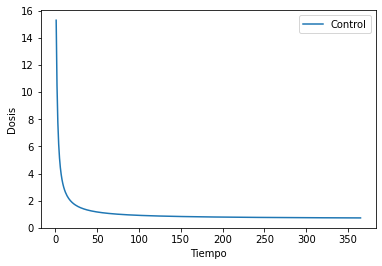

In [ ]:
def Control(t):
  return gamma*(a*(gamma*t*np.exp(gamma*t) + 1) + gamma*(np.exp(gamma*t) - 1)*scipy.special.lambertw((gamma*t*np.exp(gamma*t) + 1)*np.exp(-(a*gamma*t*np.exp(gamma*t) + a + gamma**2*t*(np.exp(gamma*t) - 1) - gamma*np.exp(gamma*t)*np.log(k*k1*np.exp(t*(a + gamma))) + gamma*np.exp(gamma*t)*np.log(2) + gamma*np.log(k*k1*np.exp(t*(a + gamma))) - gamma*np.log(2))/(gamma*(np.exp(gamma*t) - 1)))/(gamma**2*(np.exp(gamma*t) - 1))))*np.exp(gamma*t)/(k*(gamma*t*np.exp(gamma*t) + 1)*(np.exp(gamma*t) - 1))
t = np.linspace(1, 365, 365)

u = gamma*(a*(gamma*t*np.exp(gamma*t) + 1) + gamma*(np.exp(gamma*t) - 1)*scipy.special.lambertw((gamma*t*np.exp(gamma*t) + 1)*np.exp(-(a*gamma*t*np.exp(gamma*t) + a + gamma**2*t*(np.exp(gamma*t) - 1) - gamma*np.exp(gamma*t)*np.log(k*k1*np.exp(t*(a + gamma))) + gamma*np.exp(gamma*t)*np.log(2) + gamma*np.log(k*k1*np.exp(t*(a + gamma))) - gamma*np.log(2))/(gamma*(np.exp(gamma*t) - 1)))/(gamma**2*(np.exp(gamma*t) - 1))))*np.exp(gamma*t)/(k*(gamma*t*np.exp(gamma*t) + 1)*(np.exp(gamma*t) - 1))

marcador=1

if marcador==1:
  t = np.linspace(1, 365, 365)
  plt.plot(t, u*1.5, label='Control')  
  plt.xlabel('Tiempo')
  plt.ylabel('Dosis')
  plt.legend()
  plt.show
  #plt.xlim(-0.1,1.5)
  #plt.ylim(0,30)

/usr/local/lib/python3.7/dist-packages/scipy/integrate/odepack.py:245: ComplexWarning: Casting complex values to real discards the imaginary part
  int(bool(tfirst)))
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


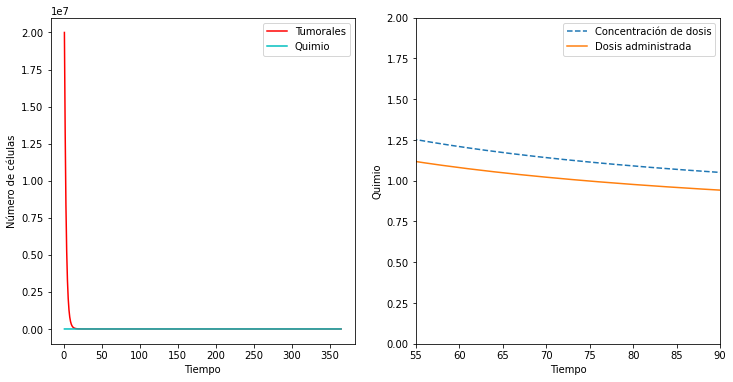

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import sympy
from scipy.integrate import odeint
 
 
 
#### PARÁMETROS PACIENTE 9 #########
a, b, c, d, e, l, f, g, h, j, k, m, q, p, s, r1, r2, u, alpha, beta, gamma, pi, gi, mui = 4.31e-1, 1.02e-9, 6.41e-11, 2.34, 2.08e-7, 2.09, 4.12e-2, 1.25e-2, 2.02e7, 2.49e-2, 3.66e7, 2.04e-1, 1.42e-6, 3.42e-6, 8.39e-2, 1.10e-7, 6.50e-11, 3.00e-10, 7.50e8, 1.20e-2, 9.00e-1, 1.25e-1, 2.00e7, 1.00e1
k = 9.00e-1
k1= 2e7


def dP_dt(P, t):
    T=P[0]
    M=P[1]
    
 
    if 0 <= t <= 1:
      u = 0
    else: 
      u = gamma*(a*(gamma*t*np.exp(gamma*t) + 1) + gamma*(np.exp(gamma*t) - 1)*scipy.special.lambertw((gamma*t*np.exp(gamma*t) + 1)*np.exp(-(a*gamma*t*np.exp(gamma*t) + a + gamma**2*t*(np.exp(gamma*t) - 1) - gamma*np.exp(gamma*t)*np.log(k*k1*np.exp(t*(a + gamma))) + gamma*np.exp(gamma*t)*np.log(2) + gamma*np.log(k*k1*np.exp(t*(a + gamma))) - gamma*np.log(2))/(gamma*(np.exp(gamma*t) - 1)))/(gamma**2*(np.exp(gamma*t) - 1))))*np.exp(gamma*t)/(k*(gamma*t*np.exp(gamma*t) + 1)*(np.exp(gamma*t) - 1))
    
    return [a*T -  k*(1 - np.exp(-M))*T,  
            -gamma*M + 1.5*u] 
 
 
u = gamma*(a*(gamma*t*np.exp(gamma*t) + 1) + gamma*(np.exp(gamma*t) - 1)*scipy.special.lambertw((gamma*t*np.exp(gamma*t) + 1)*np.exp(-(a*gamma*t*np.exp(gamma*t) + a + gamma**2*t*(np.exp(gamma*t) - 1) - gamma*np.exp(gamma*t)*np.log(k*k1*np.exp(t*(a + gamma))) + gamma*np.exp(gamma*t)*np.log(2) + gamma*np.log(k*k1*np.exp(t*(a + gamma))) - gamma*np.log(2))/(gamma*(np.exp(gamma*t) - 1)))/(gamma**2*(np.exp(gamma*t) - 1))))*np.exp(gamma*t)/(k*(gamma*t*np.exp(gamma*t) + 1)*(np.exp(gamma*t) - 1))

t = np.linspace(1, 365., 365)
P0 = [2e7, 0] 
sol = odeint(dP_dt, P0, t)
Tumorales = sol[:,0]
M = sol[:,1]

 
#plt.yscale('log')
fig,ax=plt.subplots(1,2,figsize=(12,6))
#plt.ylim(0, 10e12)
#ax[0].grid()
ax[0].plot(t, Tumorales, "r-", label="Tumorales")
ax[0].plot(t, M, "c-", label="Quimio")
ax[0].set_xlabel("Tiempo")
ax[0].set_ylabel("Número de células")
ax[0].legend(loc=1);
#ax[0].set_ylim(0, 1)
#ax[0].set_xlim(55, 90)

ax[1].plot(t, M, "--", label="Concentración de dosis")
ax[1].plot(t, u*1.5, "-", label="Dosis administrada")
ax[1].set_ylabel("Quimio")
ax[1].set_xlabel("Tiempo")
ax[1].legend(loc=1);
ax[1].set_ylim(0, 2)
ax[1].set_xlim(55, 90)